# Data Cleaning and Understanding Data

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
warnings.filterwarnings('ignore')

telco = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [2]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


    customerID : Customer ID
    gender : Whether the customer is a male or a female
    SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
    Partner : Whether the customer has a partner or not (Yes, No)
    Dependents : Whether the customer has dependents or not (Yes, No)
    tenure : Number of months the customer has stayed with the company
    PhoneService : Whether the customer has a phone service or not (Yes, No)
    MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
    InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
    OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
    OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
    DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
    TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
    StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
    StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
    Contract : The contract term of the customer (Month-to-month, One year, Two year)
    PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
    PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
    MonthlyCharges : The amount charged to the customer monthly
    TotalCharges : The total amount charged to the customer
    Churn : Whether the customer churned or not (Yes or No)

In [5]:
telco.isnull().sum()*100/telco.shape[0]

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

### As you can see, we have no null values. We will not fill in a blank value.

### TotalCharges column object has arrived. We need to investigate it. Why did the object come?

In [6]:
# Let's check the meaningless or missing values by examining the data in variables.
for column in telco.columns[1:]:
    print(f"The unique values in \"{column}\" column:\n {telco[column].unique()}\n")

The unique values in "gender" column:
 ['Female' 'Male']

The unique values in "SeniorCitizen" column:
 [0 1]

The unique values in "Partner" column:
 ['Yes' 'No']

The unique values in "Dependents" column:
 ['No' 'Yes']

The unique values in "tenure" column:
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

The unique values in "PhoneService" column:
 ['No' 'Yes']

The unique values in "MultipleLines" column:
 ['No phone service' 'No' 'Yes']

The unique values in "InternetService" column:
 ['DSL' 'Fiber optic' 'No']

The unique values in "OnlineSecurity" column:
 ['No' 'Yes' 'No internet service']

The unique values in "OnlineBackup" column:
 ['Yes' 'No' 'No internet service']

The unique values in "DeviceProtection" column:
 ['No' 'Yes' 'No internet service']

The unique values in "TechSupport" column:
 ['No' '

In [7]:
for column_name in telco.columns[2:]:
    print("{} wrong variable : ".format(column_name))
    wrong_variable = []
    for i in telco[column_name]:
        try:
            float(i)
        except:
            wrong_variable.append(i)
    print(set(wrong_variable))


SeniorCitizen wrong variable : 
set()
Partner wrong variable : 
{'Yes', 'No'}
Dependents wrong variable : 
{'Yes', 'No'}
tenure wrong variable : 
set()
PhoneService wrong variable : 
{'Yes', 'No'}
MultipleLines wrong variable : 
{'Yes', 'No phone service', 'No'}
InternetService wrong variable : 
{'Fiber optic', 'No', 'DSL'}
OnlineSecurity wrong variable : 
{'No internet service', 'Yes', 'No'}
OnlineBackup wrong variable : 
{'No internet service', 'Yes', 'No'}
DeviceProtection wrong variable : 
{'No internet service', 'Yes', 'No'}
TechSupport wrong variable : 
{'No internet service', 'Yes', 'No'}
StreamingTV wrong variable : 
{'No internet service', 'Yes', 'No'}
StreamingMovies wrong variable : 
{'No internet service', 'Yes', 'No'}
Contract wrong variable : 
{'Two year', 'One year', 'Month-to-month'}
PaperlessBilling wrong variable : 
{'Yes', 'No'}
PaymentMethod wrong variable : 
{'Credit card (automatic)', 'Electronic check', 'Bank transfer (automatic)', 'Mailed check'}
MonthlyCharges 

In [8]:
telco[telco['TotalCharges'].isin([" "])].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [9]:
telco.drop(['TotalCharges'], axis = 1, inplace=True)
telco.info()
telco["TotalCharges"]=telco.MonthlyCharges*telco.tenure
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
telco.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
Churn                  2
TotalCharges        6051
dtype: int64

### I will take columns from gender to paymentMetho to visualize.

In [11]:
a=telco.columns[1:18] 
a

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

## Univariate and multivariate analysis

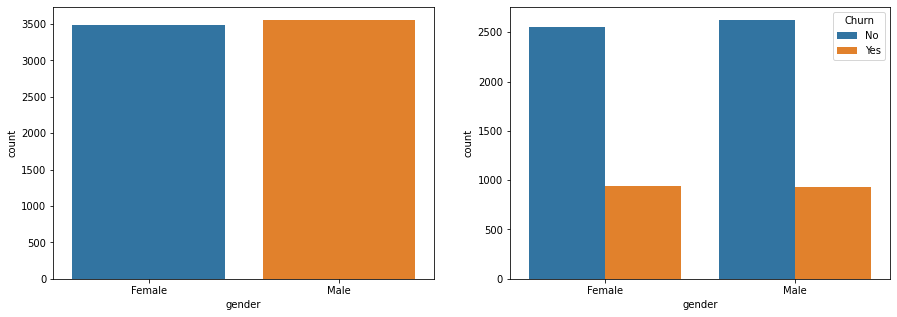

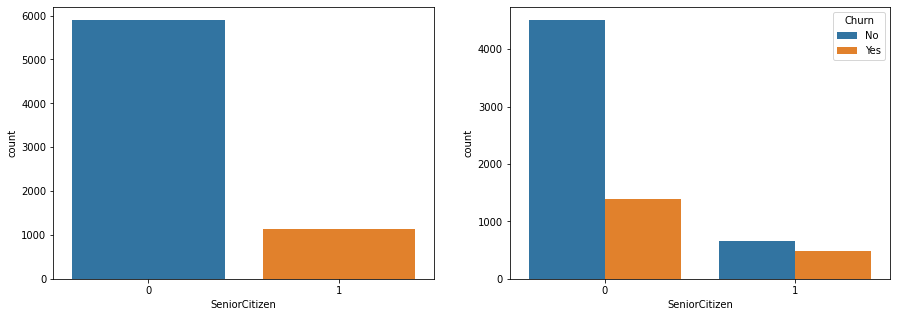

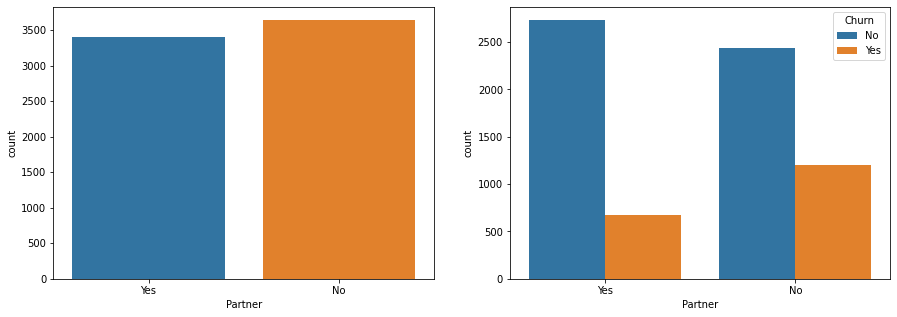

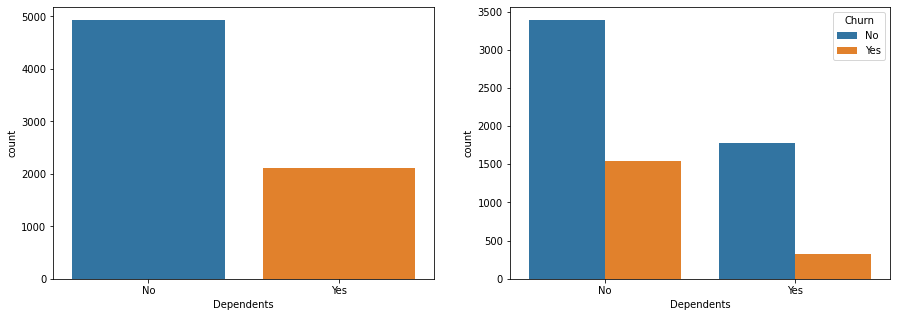

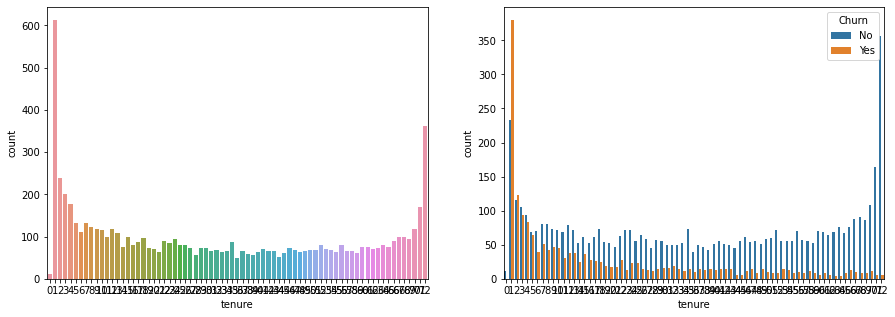

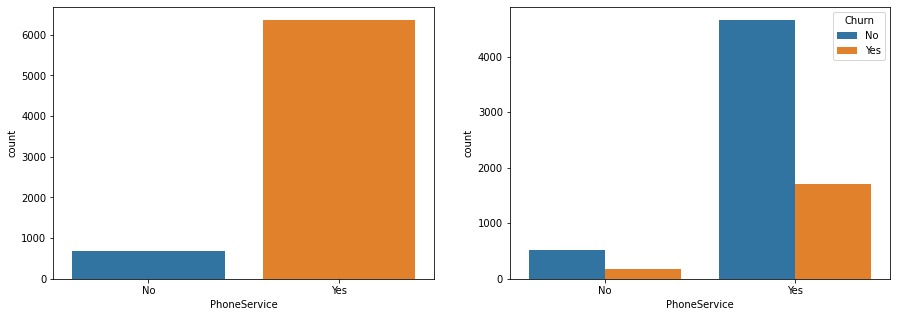

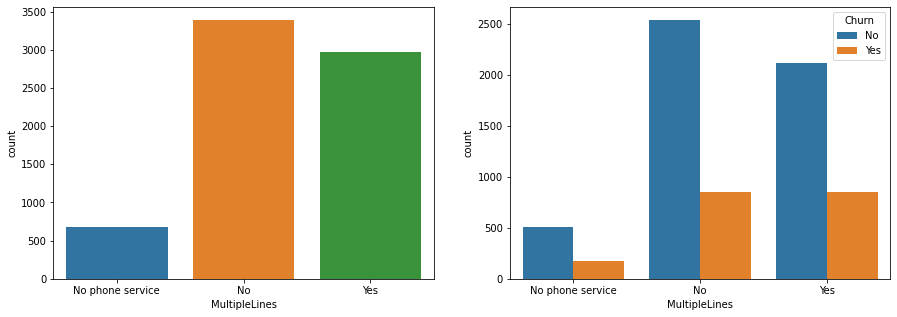

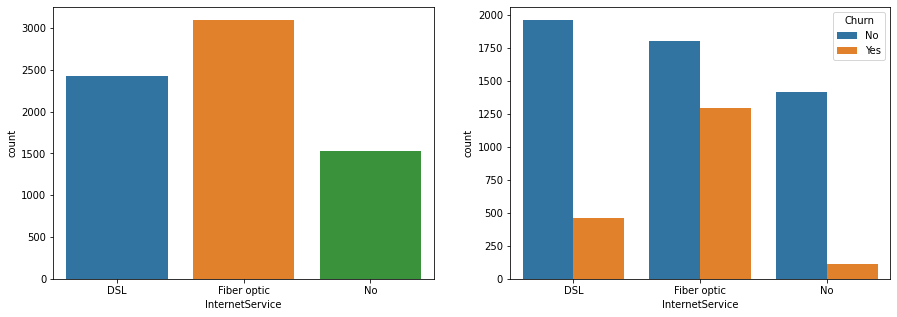

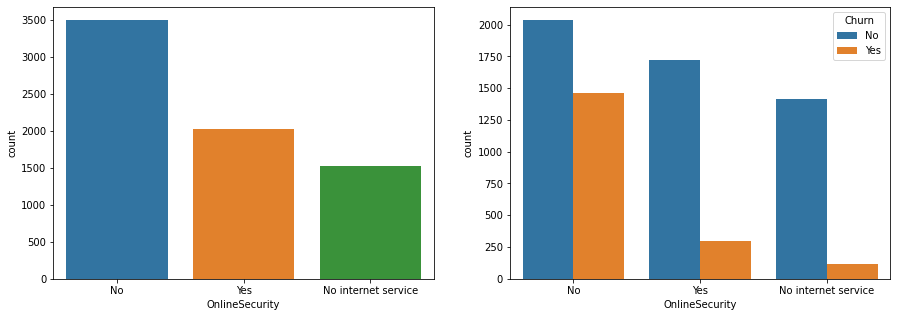

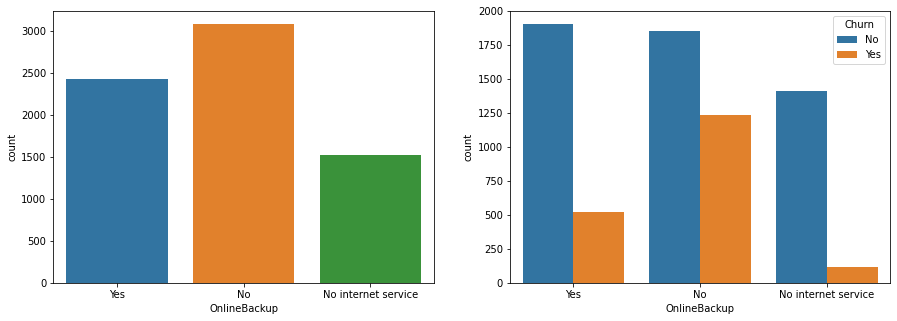

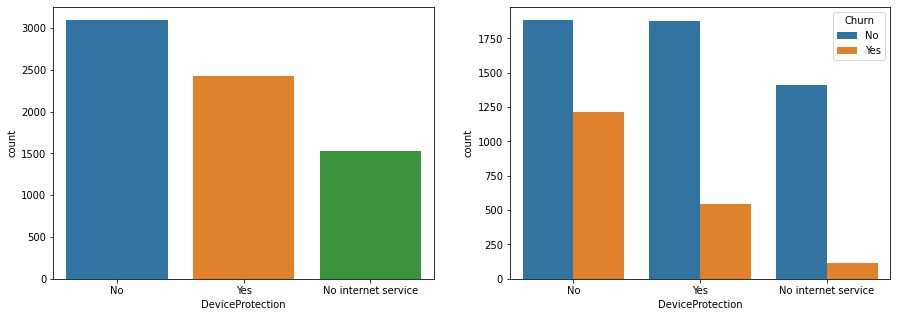

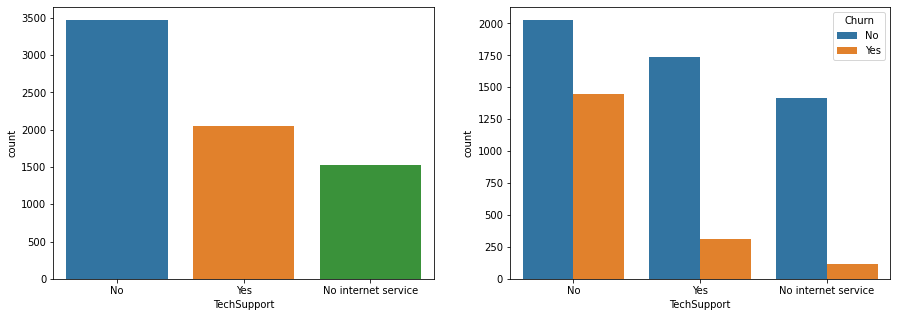

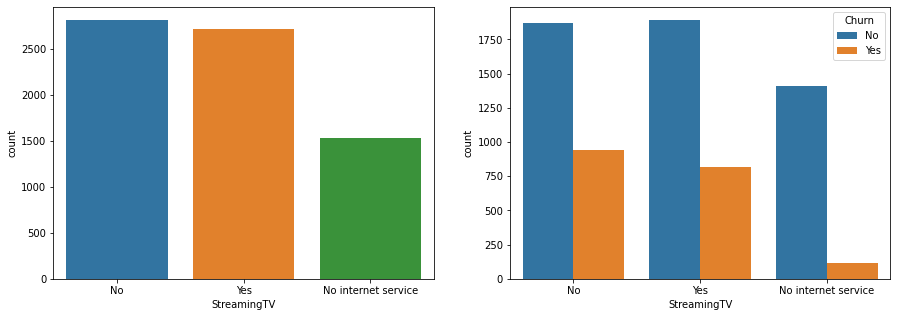

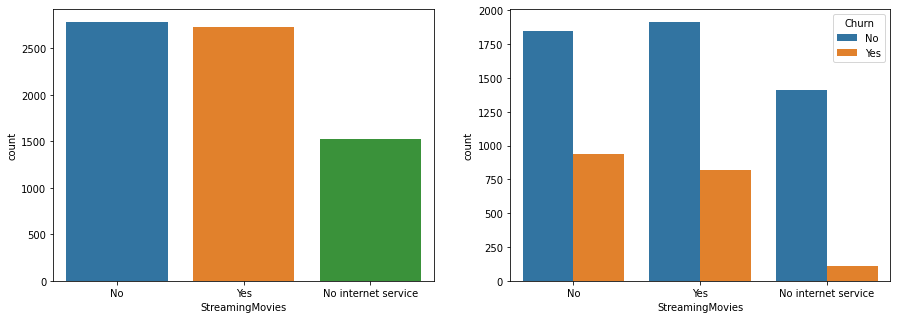

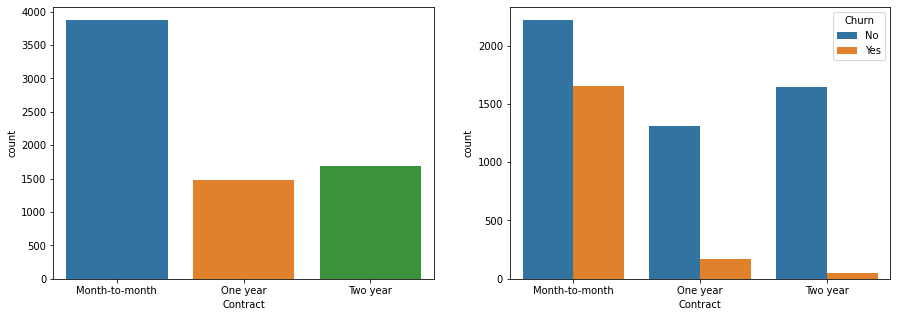

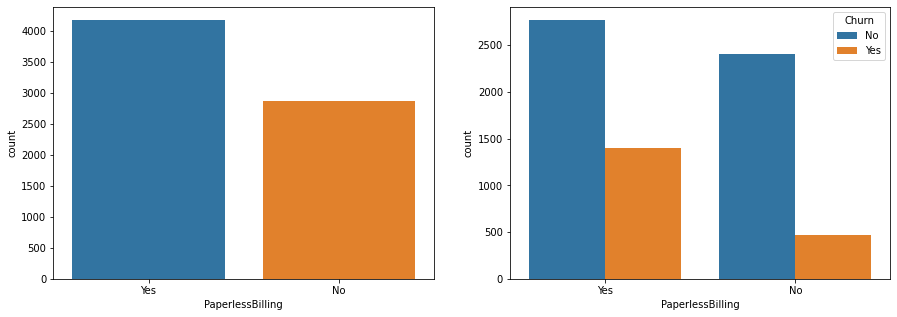

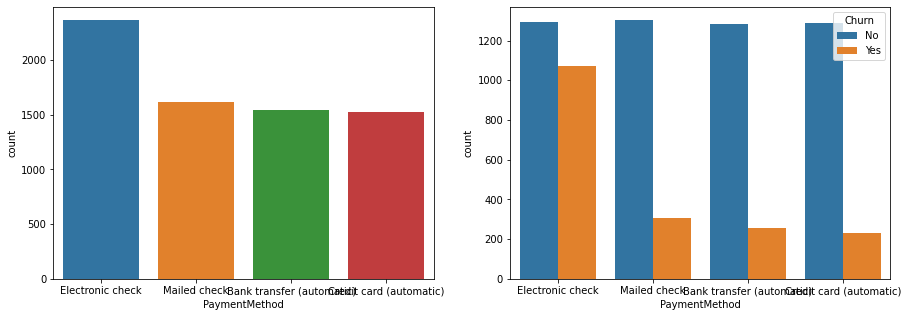

In [12]:
for i in a:
    plt.figure(figsize = (15,5))
    plt.subplot(1,2,1)
    sns.countplot(x=i, data=telco)
    plt.subplot(1,2,2)
    sns.countplot(x=i, hue="Churn", data=telco)
plt.show()

<AxesSubplot:title={'center':'TotalCharges'}, ylabel='Density'>

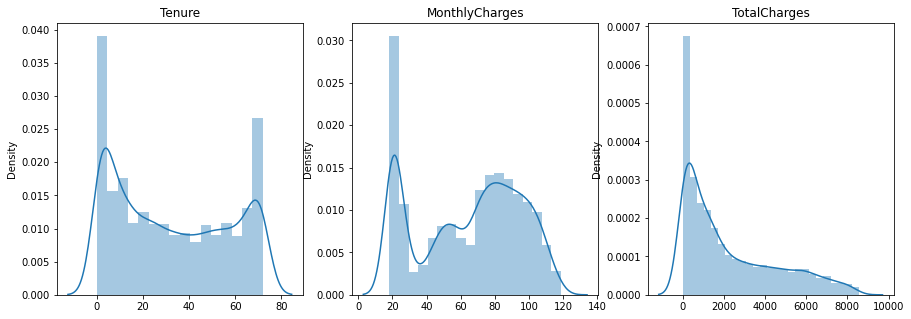

In [13]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
plt.title("Tenure")
sns.distplot(telco["tenure"].tolist())
plt.subplot(1,3,2)
plt.title("MonthlyCharges")
sns.distplot(telco["MonthlyCharges"].tolist())
plt.subplot(1,3,3)
plt.title("TotalCharges")
sns.distplot(telco["TotalCharges"].tolist())


<AxesSubplot:xlabel='Churn', ylabel='tenure'>

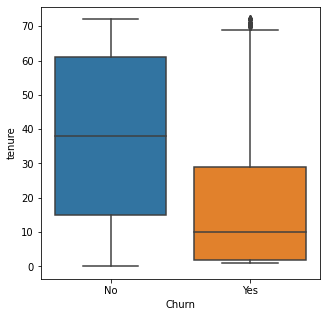

In [14]:
plt.figure(figsize = (5,5))
sns.boxplot(x = telco.Churn, y = telco.tenure)

### Churn vs Tenure: As can be seen from the image above, the tendency to churn decreases as the tenure time increases.

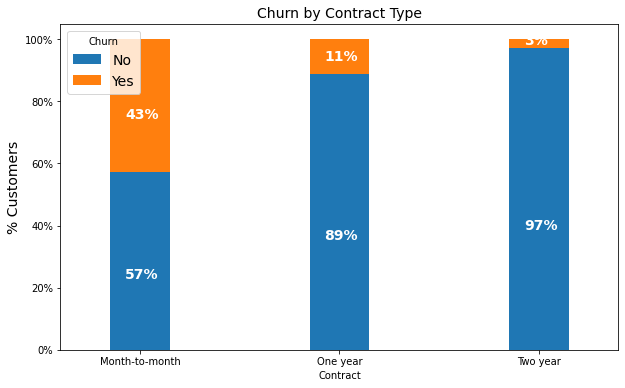

In [15]:
import matplotlib.ticker as mtick # For specifying the axes tick format 

contract_churn = telco.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6)
                                                                )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

### Churn by Contract Type: As can be seen from the image above, the longer the contract type is, the less likely it is to churn.

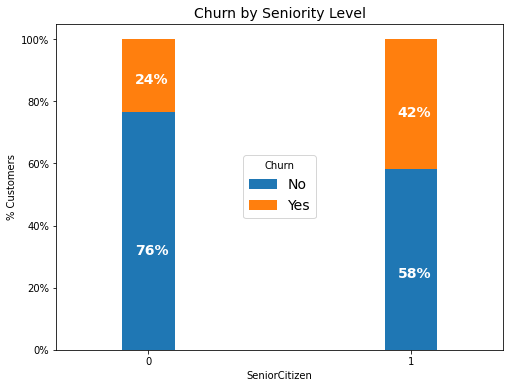

In [16]:
seniority_churn = telco.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6)
                                                                )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

### Churn by Seniority: As can be seen from the image above, senior Citizens tend to churn more than the younger population.

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

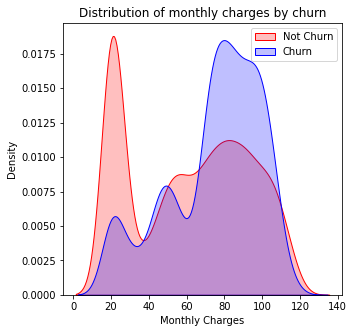

In [17]:
plt.figure(figsize = (5,5))
ax = sns.kdeplot(telco.MonthlyCharges[(telco["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telco.MonthlyCharges[(telco["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

### Churn by Monthly Charges: As can be seen from the image above, people with high  monthly charges are high to churn.

Text(0.5, 1.0, 'Distribution of total charges by churn')

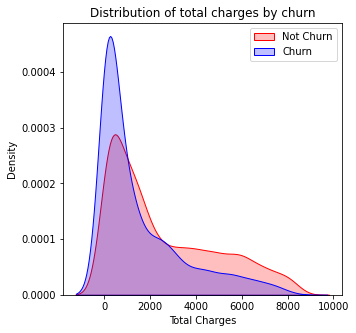

In [18]:
plt.figure(figsize = (5,5))
ax = sns.kdeplot(telco.TotalCharges[(telco["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telco.TotalCharges[(telco["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

### Churn by Total Charges: As can be seen from the image above, people with low monthly charges are high to churn more.

    It was observed that there was no distinctive feature among the sexes.
    It was observed that the rate of quitting was higher in the elderly population.
    It has been observed that those who establish a partnership are more dependent on the operator.
    If our Dependents feature is no, it was observed that the churn probability increased.
    It was observed that as the tenure decreased, the possibility of churn increased.
    It has been observed that the PhoneService feature is not a distinguishing feature.
    It was observed that the MultipleLines feature was not a distinguishing feature.
    It has been observed that fiber optic users churn heavily.
    It has been observed that people who do not use OnlineSecurity churn significantly.
    It has been observed that people who do not use OnlineBackup churn significantly.
    It has been observed that people who do not use DeviceProtection churn obviously.
    It has been observed that people who do not use TechSupport churn significantly.
    It was observed that the StreamingTV feature was not a distinguishing feature.
    It was observed that the StreamingMovies feature is not a distinguishing feature.
    It has been observed that the shorter the contracts, the more likely it is to churn.
    It was observed that the section that did not use paper churned more.
    It was observed that the electronic payers churn more.
    
    Cinsiyetler arasında belirgin bir özelliğin ayırt edici bir özellik olmadığı gözlemlendi.
    Yaşlı kesmin bırakma oLasılığının daha yüksek olduğu gözlemlendi.
    Partnerlik kuranların operatöre daha bağlı olduğu gözlemlendi.
    Dependents özelliğimiz no ise churn olasılığının arttığı gözlemlendi.
    Tenure azaldıkça churn olasılığının da arttığı gözlemlendi.
    PhoneService özelliğininin ayırt edici bir özellik olmadığı gözlemlendi.
    MultipleLines özelliğininin ayırt edici bir özellik olmadığı gözlemlendi.
    Fiber optic kullananların yoğun bir şekilde churn ettikleri gözlemlendi.
    OnlineSecurity kullanmayan insanların belirgin bir şekilde churn ettikleri gözlemlendi.
    OnlineBackup kullanmayan insanların belirgin bir şekilde churn ettikleri gözlemlendi.
    DeviceProtection kullanmayan insanların belirgin bir şekilde churn ettikleri gözlemlendi.
    TechSupport kullanmayan insanların belirgin bir şekilde churn ettikleri gözlemlendi.
    StreamingTV özelliğininin ayırt edici bir özellik olmadığı gözlemlendi.
    StreamingMovies özelliğininin ayırt edici bir özellik olmadığı gözlemlendi.
    Sözleşmeler ne kadar kısaysa o kadar fazla olasılıkla churn olduğu gözlemlendi.
    Kağıt kullanmayan kesmin daha çok churn yaptığı gözlemlendi.
    Elektronik ödeyen kesmin daha çok churn yaptığı gözlemlendi.

## Feature Engineering 

### We need to make our features numerical

In [19]:
label_encoding = {
                        "gender": {
                            "Male": 1,
                            "Female": 0
                        },
                        
                        "Partner": {
                            "Yes": 1,
                            "No": 0
                        },
                        "Dependents": {
                            "Yes": 1,
                            "No": 0
                        },
                        "PhoneService": {
                            "Yes": 1,
                            "No": 0
                        },
                        "MultipleLines": {
                            "Yes": 2,
                            "No": 1,
                            "No phone service": 0
                        },
                        "InternetService": {
                            "Fiber optic": 2,
                            "DSL": 1,
                            "No": 0
                        },
                        "OnlineSecurity": {
                            "Yes": 2,
                            "No": 1,
                            "No internet service": 0
                        },
                        "OnlineBackup": {
                            "Yes": 2,
                            "No": 1,
                            "No internet service": 0
                        },
                        "DeviceProtection": {
                            "Yes": 2,
                            "No": 1,
                            "No internet service": 0
                        },
                        "TechSupport": {
                            "Yes": 2,
                            "No": 1,
                            "No internet service": 0
                        },
                        "StreamingTV": {
                            "Yes": 2,
                            "No": 1,
                            "No internet service": 0
                        },
                        "StreamingMovies": {
                            "Yes": 2,
                            "No": 1,
                            "No internet service": 0
                        },
                        "Contract": {
                            "Two year": 3,
                            "One year": 2,
                            "Month-to-month": 1
                        },
                        "PaperlessBilling": {
                            "Yes": 1,
                            "No": 0,
                        },
                        "PaymentMethod": {
                            "Credit card (automatic)": 3,
                            "Bank transfer (automatic)": 2,
                            "Mailed check": 1,
                            "Electronic check": 0
                        },
                        "Churn": {
                            "Yes": 1,
                            "No": 0
                        }
                    }

for column, val_mapping in label_encoding.items():
    telco[column] = telco[column].apply(lambda i: val_mapping[i])
telco.drop(['gender','customerID'], axis = 1, inplace=True)
telco.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalCharges
0,0,1,0,1,0,0,1,1,2,1,1,1,1,1,1,0,29.85,0,29.85
1,0,0,0,34,1,1,1,2,1,2,1,1,1,2,0,1,56.95,0,1936.30
2,0,0,0,2,1,1,1,2,2,1,1,1,1,1,1,1,53.85,1,107.70
3,0,0,0,45,0,0,1,2,1,2,2,1,1,2,0,2,42.30,0,1903.50
4,0,0,0,2,1,1,2,1,1,1,1,1,1,1,1,0,70.70,1,141.40


### Features that are not indistinguishable with Churn are dropped.

In [20]:
telco.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalCharges
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.113791,0.259390,0.081878,0.144828,0.140298,0.067457,0.167188,0.176469,-0.142554,0.156530,-0.093704,0.220173,0.150889,0.103261
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,0.117307,-0.000132,0.091303,0.090753,0.098664,0.076551,0.079785,0.075098,0.294806,-0.014877,0.133115,0.096848,-0.150448,0.317462
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.019657,-0.179631,-0.029721,-0.062775,-0.069078,-0.040788,-0.086739,-0.101475,0.243187,-0.111377,0.123844,-0.113890,-0.164221,0.062290
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.258958,0.033230,0.232373,0.253743,0.253999,0.230522,0.201053,0.205031,0.671607,0.006152,0.340305,0.247900,-0.352229,0.826568
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,0.675070,0.093720,-0.159989,-0.129770,-0.142012,-0.161930,-0.108239,-0.114715,0.002247,0.016505,-0.004070,0.247398,0.011942,0.113336
MultipleLines,0.113791,0.117307,-0.019657,0.258958,0.675070,1.000000,0.307988,0.069085,0.130619,0.124502,0.069149,0.165254,0.162841,0.083343,0.133255,0.025676,0.490700,0.036310,0.412348
InternetService,0.259390,-0.000132,-0.179631,0.033230,0.093720,0.307988,1.000000,0.582325,0.658718,0.663011,0.586074,0.725645,0.723065,-0.290189,0.378108,-0.178137,0.905491,0.316846,0.429411
OnlineSecurity,0.081878,0.091303,-0.029721,0.232373,-0.159989,0.069085,0.582325,1.000000,0.705166,0.701690,0.735191,0.662220,0.667033,0.015824,0.184993,0.036306,0.635534,0.023309,0.482999
OnlineBackup,0.144828,0.090753,-0.062775,0.253743,-0.129770,0.130619,0.658718,0.705166,1.000000,0.711335,0.709216,0.703167,0.700158,-0.035407,0.260715,-0.003183,0.710477,0.074205,0.537808
DeviceProtection,0.140298,0.098664,-0.069078,0.253999,-0.142012,0.124502,0.663011,0.701690,0.711335,1.000000,0.725327,0.748182,0.752952,0.005848,0.246069,0.006230,0.737104,0.084654,0.545671


### We are trying to create a more meaningful columns by combining features.

In [21]:
telco["Phone_Reliance"] = (telco["PhoneService"] + telco["MultipleLines"]) / 2
telco["Support"] = (telco["OnlineSecurity"] + telco["OnlineBackup"] + telco["DeviceProtection"] + telco["TechSupport"]) / 4
telco["Online_Services"] = (telco["InternetService"] + telco["StreamingTV"] + telco["StreamingMovies"]) / 3
drop_cols = ["PaperlessBilling", "PhoneService", "MultipleLines",
             "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
            "InternetService", "StreamingTV", "StreamingMovies"]
telco = telco.drop(drop_cols, axis=1)
telco2=telco
telco.head()

,SeniorCitizen,Partner,Dependents,tenure,Contract,PaymentMethod,MonthlyCharges,Churn,TotalCharges,Phone_Reliance,Support,Online_Services
0,0,1,0,1,1,0,29.85,0,29.85,0.0,1.25,1.000000
1,0,0,0,34,2,1,56.95,0,1936.30,1.0,1.50,1.000000
2,0,0,0,2,1,1,53.85,1,107.70,1.0,1.50,1.000000
3,0,0,0,45,2,2,42.30,0,1903.50,0.0,1.75,1.000000
4,0,0,0,2,1,0,70.70,1,141.40,1.0,1.00,1.333333


### In the name of feature engineering, the combination of features was made. Their correlations were observed.

<AxesSubplot:>

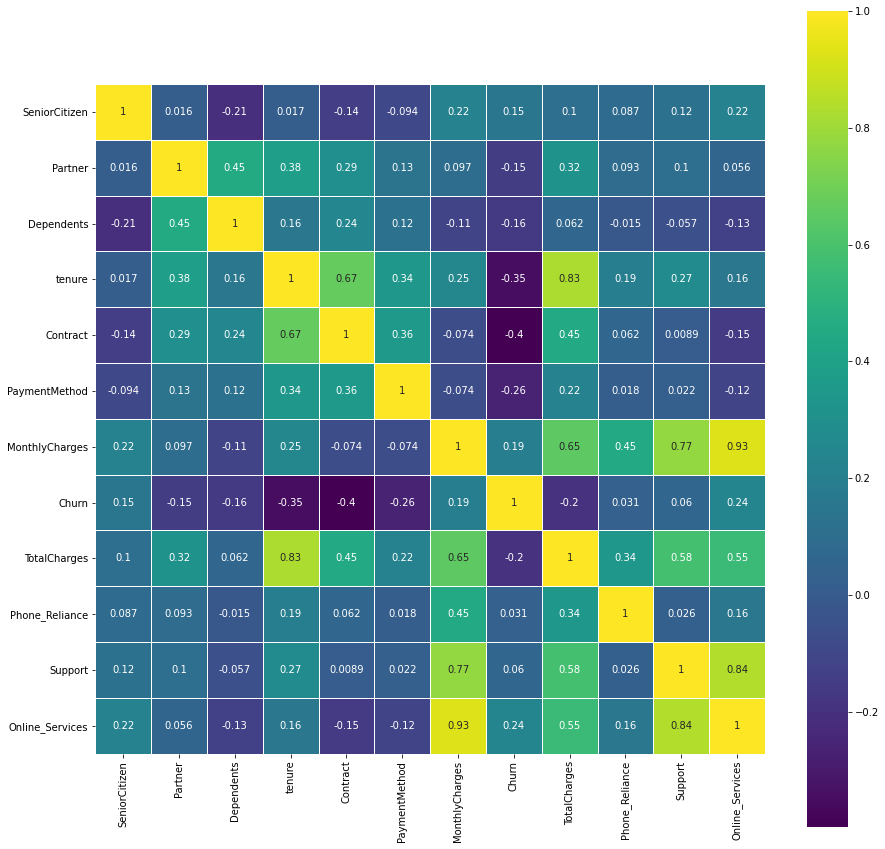

In [22]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(telco.corr(),  square=True, annot=True, linewidths=.5, cmap='viridis',ax=ax)

### The columns that make the most sense with churn are above.

## Outliers

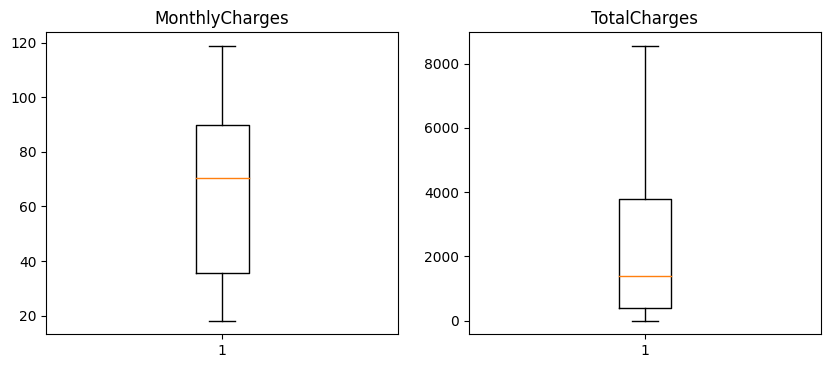

In [23]:
plt.rcParams["figure.dpi"]= 100
plt.rcParams["figure.figsize"] = (10,4)
plt.subplot(1,2,1)
plt.boxplot(telco["MonthlyCharges"])
plt.title("MonthlyCharges")
plt.subplot(1,2,2)
plt.boxplot(telco["TotalCharges"])
plt.title("TotalCharges")
plt.show()

### We also apply statistical methods for outliers that we cannot immediately see on the box plot.

In [24]:
#z score
from scipy.stats import zscore
z_scores = zscore(telco["TotalCharges"])
for threshold in range(1,5):
    print("Threshold: {}".format(threshold))
    print("Number of outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('-------------------------')

Threshold: 1
Number of outliers: 1376
-------------------------
Threshold: 2
Number of outliers: 393
-------------------------
Threshold: 3
Number of outliers: 0
-------------------------
Threshold: 4
Number of outliers: 0
-------------------------


In [25]:
#z score
from scipy.stats import zscore
z_scores = zscore(telco["MonthlyCharges"])
for threshold in range(1,5):
    print("Threshold: {}".format(threshold))
    print("Number of outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('-------------------------')

Threshold: 1
Number of outliers: 1324
-------------------------
Threshold: 2
Number of outliers: 0
-------------------------
Threshold: 3
Number of outliers: 0
-------------------------
Threshold: 4
Number of outliers: 0
-------------------------


## Tukey Method

In [26]:
q75, q25 = np.percentile(telco["TotalCharges"], [75 ,25])
caa = q75 - q25

thresholds = pd.DataFrame()

for threshold in np.arange(1,5,0.5):
    min_deger = q25 - (caa*threshold)
    maks_deger = q75 + (caa*threshold)
    aykiri_deger_sayisi = len((np.where((telco["TotalCharges"] > maks_deger)| 
                                       (telco["TotalCharges"] < min_deger))[0]))
    thresholds = thresholds.append({'Number of outliers': aykiri_deger_sayisi,'Threshold': threshold}, 
                                           ignore_index=True)
thresholds

,Number of outliers,Threshold
0,266.0,1.0
1,0.0,1.5
2,0.0,2.0
3,0.0,2.5
4,0.0,3.0
5,0.0,3.5
6,0.0,4.0
7,0.0,4.5


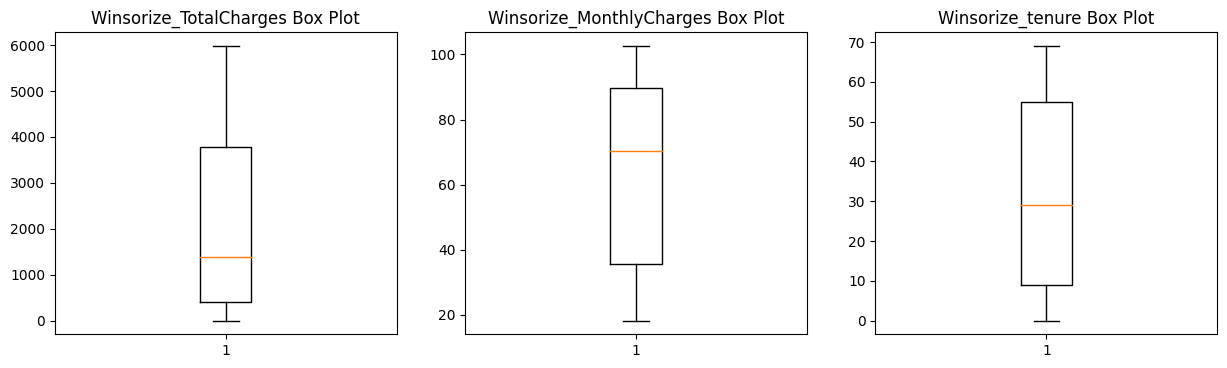

In [27]:
from scipy.stats.mstats import winsorize
plt.rcParams["figure.figsize"] = (15,4)
plt.subplot(1,3,1)
telco["Winsorize_TotalCharges"] = winsorize(telco["TotalCharges"], (0, 0.10))
plt.rcParams["figure.figsize"] = (3,4)
plt.boxplot(telco["Winsorize_TotalCharges"])
plt.title("Winsorize_TotalCharges Box Plot")
plt.subplot(1,3,2)
telco["Winsorize_MonthlyCharges"] = winsorize(telco["MonthlyCharges"], (0, 0.10))
plt.rcParams["figure.figsize"] = (3,4)
plt.boxplot(telco["Winsorize_MonthlyCharges"])
plt.title("Winsorize_MonthlyCharges Box Plot")
plt.subplot(1,3,3)
telco["Winsorize_tenure"] = winsorize(telco["tenure"], (0, 0.10))
plt.rcParams["figure.figsize"] = (3,4)
plt.boxplot(telco["Winsorize_tenure"])
plt.title("Winsorize_tenure Box Plot")
plt.show()

In [28]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

ozellikler = ["tenure","MonthlyCharges","TotalCharges"]
dagilim_testleri = pd.DataFrame(columns=['features', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for ozellik in ozellikler:
    jb_stats = jarque_bera(telco[ozellik])
    norm_stats = normaltest(telco[ozellik])
    dagilim_testleri = dagilim_testleri.append({"features": ozellik,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
dagilim_testleri

,features,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,tenure,632.06541,0.00000,76258.50517,0.00000
1,MonthlyCharges,520.90061,0.00000,11419.52879,0.00000
2,TotalCharges,1099.28206,0.00000,806.92432,0.00000


### p-values is 0, the selected properties explain our data.

In [29]:
telco.describe()

,SeniorCitizen,Partner,Dependents,tenure,Contract,PaymentMethod,MonthlyCharges,Churn,TotalCharges,Phone_Reliance,Support,Online_Services,Winsorize_TotalCharges,Winsorize_MonthlyCharges,Winsorize_tenure
count,7043.00000,7043.00000,7043.00000,7043.00000,7043.00000,7043.00000,7043.00000,7043.00000,7043.00000,7043.00000,7043.00000,7043.00000,7043.00000,7043.00000,7043.00000
mean,0.16215,0.48303,0.29959,32.37115,1.69047,1.31563,64.76169,0.26537,2279.58135,1.11408,1.09974,1.18728,2176.34228,64.19504,32.15178
std,0.36861,0.49975,0.45811,24.55948,0.83376,1.14891,30.09005,0.44156,2264.72945,0.43509,0.64061,0.69856,2049.07029,29.28140,24.21717
min,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,18.25000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,18.25000,0.00000
25%,0.00000,0.00000,0.00000,9.00000,1.00000,0.00000,35.50000,0.00000,394.00000,1.00000,1.00000,1.00000,394.00000,35.50000,9.00000
50%,0.00000,0.00000,0.00000,29.00000,1.00000,1.00000,70.35000,0.00000,1393.60000,1.00000,1.25000,1.33333,1393.60000,70.35000,29.00000
75%,0.00000,1.00000,1.00000,55.00000,2.00000,2.00000,89.85000,1.00000,3786.10000,1.50000,1.50000,1.66667,3786.10000,89.85000,55.00000
max,1.00000,1.00000,1.00000,72.00000,3.00000,3.00000,118.75000,1.00000,8550.00000,1.50000,2.00000,2.00000,5979.00000,102.60000,69.00000


In [30]:
telco.corr()

,SeniorCitizen,Partner,Dependents,tenure,Contract,PaymentMethod,MonthlyCharges,Churn,TotalCharges,Phone_Reliance,Support,Online_Services,Winsorize_TotalCharges,Winsorize_MonthlyCharges,Winsorize_tenure
SeniorCitizen,1.00000,0.01648,-0.21119,0.01657,-0.14255,-0.09370,0.22017,0.15089,0.10326,0.08696,0.12334,0.22066,0.10590,0.22269,0.01686
Partner,0.01648,1.00000,0.45268,0.37970,0.29481,0.13311,0.09685,-0.15045,0.31746,0.09266,0.10088,0.05595,0.32113,0.09232,0.37844
Dependents,-0.21119,0.45268,1.00000,0.15971,0.24319,0.12384,-0.11389,-0.16422,0.06229,-0.01512,-0.05744,-0.13482,0.06299,-0.11693,0.15941
tenure,0.01657,0.37970,0.15971,1.00000,0.67161,0.34030,0.24790,-0.35223,0.82657,0.19414,0.27399,0.15918,0.83758,0.23309,0.99965
Contract,-0.14255,0.29481,0.24319,0.67161,1.00000,0.35891,-0.07419,-0.39671,0.44696,0.06232,0.00889,-0.15403,0.43764,-0.09126,0.66809
PaymentMethod,-0.09370,0.13311,0.12384,0.34030,0.35891,1.00000,-0.07435,-0.26282,0.22274,0.01758,0.02176,-0.11648,0.22281,-0.08152,0.33914
MonthlyCharges,0.22017,0.09685,-0.11389,0.24790,-0.07419,-0.07435,1.00000,0.19336,0.65157,0.44652,0.77478,0.92880,0.64794,0.99783,0.24717
Churn,0.15089,-0.15045,-0.16422,-0.35223,-0.39671,-0.26282,0.19336,1.00000,-0.19851,0.03088,0.05965,0.23631,-0.20127,0.20226,-0.35231
TotalCharges,0.10326,0.31746,0.06229,0.82657,0.44696,0.22274,0.65157,-0.19851,1.00000,0.34309,0.58207,0.54784,0.98938,0.63204,0.82478
Phone_Reliance,0.08696,0.09266,-0.01512,0.19414,0.06232,0.01758,0.44652,0.03088,0.34309,1.00000,0.02566,0.15661,0.33943,0.44331,0.19332


<AxesSubplot:>

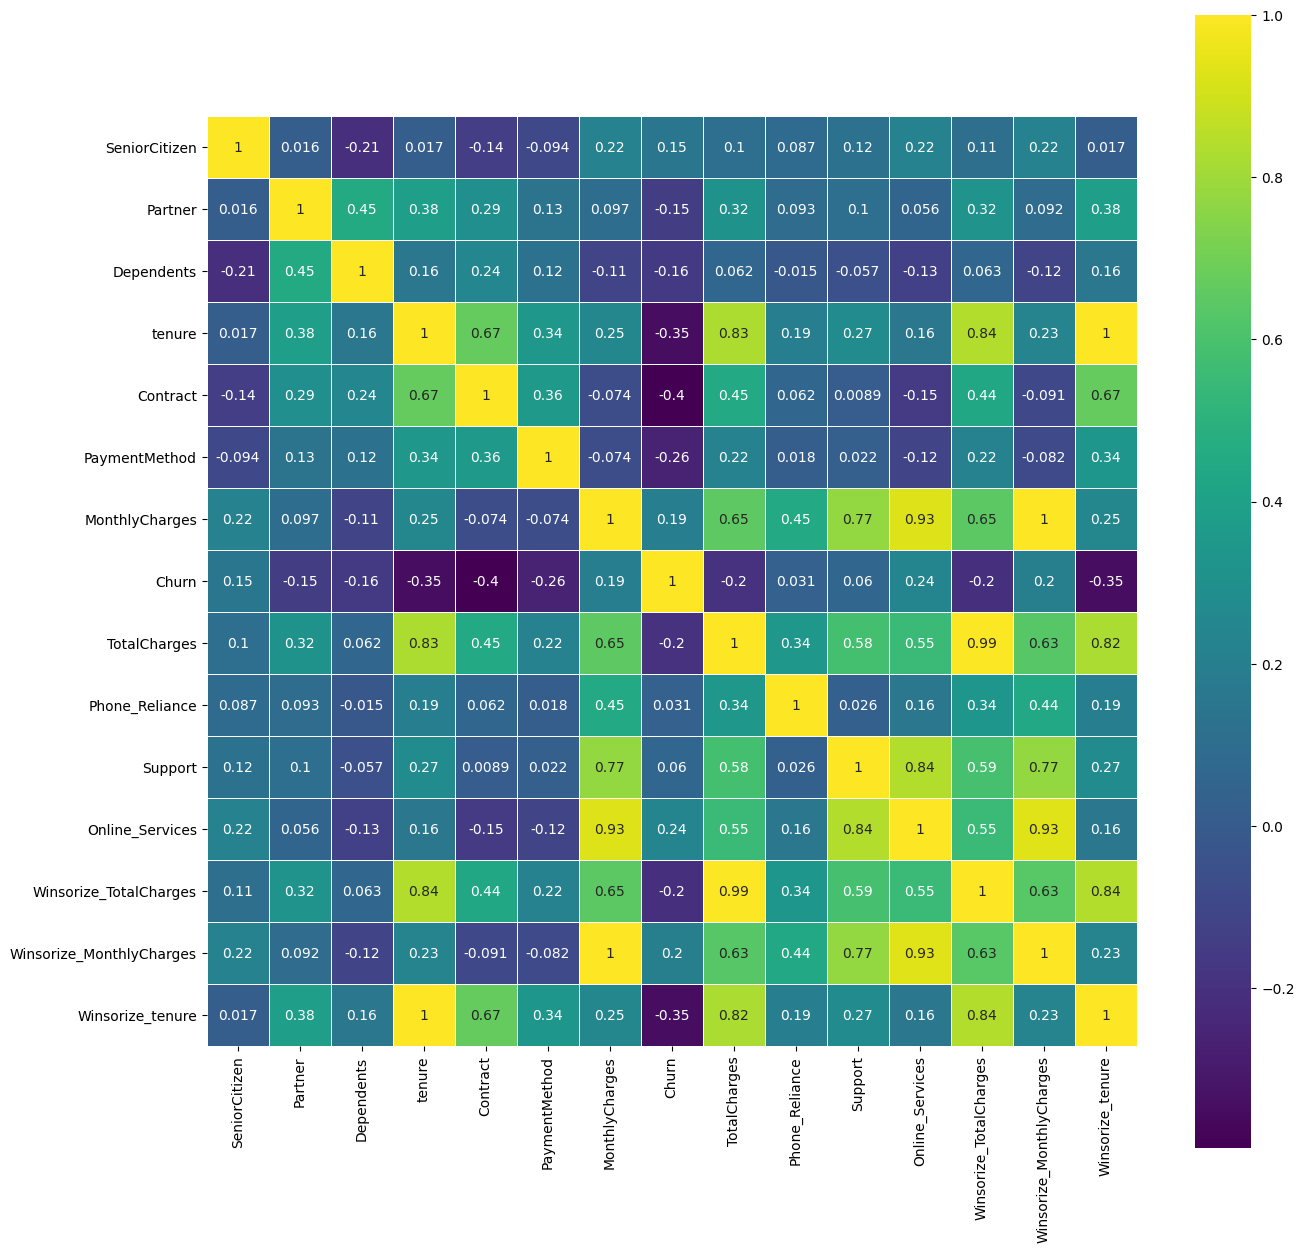

In [31]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(telco.corr(),  square=True, annot=True, linewidths=.5, cmap='viridis',ax=ax)

In [32]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize

telco["Norm_winsorize_tenure"] = normalize(np.array(telco["Winsorize_tenure"]).reshape(1,-1)).reshape(-1,1)
telco["Norm_winsorize_MonthlyCharges"] = normalize(np.array(telco["Winsorize_MonthlyCharges"]).reshape(1,-1)).reshape(-1,1)
telco["Norm_winsorize_TotalCharges"] = normalize(np.array(telco["Winsorize_TotalCharges"]).reshape(1,-1)).reshape(-1,1)
normal_features=["Winsorize_tenure","Norm_winsorize_tenure","Winsorize_MonthlyCharges","Norm_winsorize_MonthlyCharges",
                    "Winsorize_TotalCharges","Norm_winsorize_TotalCharges"]


print('Min\n',)
print(telco[normal_features].min())
print('\nMax',)
print(telco[normal_features].max())

Min

Winsorize_tenure                 0.00000
Norm_winsorize_tenure            0.00000
Winsorize_MonthlyCharges        18.25000
Norm_winsorize_MonthlyCharges    0.00308
Winsorize_TotalCharges           0.00000
Norm_winsorize_TotalCharges      0.00000
dtype: float64

Max
Winsorize_tenure                  69.00000
Norm_winsorize_tenure              0.02043
Winsorize_MonthlyCharges         102.60000
Norm_winsorize_MonthlyCharges      0.01733
Winsorize_TotalCharges          5979.00000
Norm_winsorize_TotalCharges        0.02383
dtype: float64


In [33]:
telco["scaled_winsorize_tenure"] = scale(telco["Winsorize_tenure"])
telco["scaled_winsorize_MonthlyCharges"] = scale(telco["Winsorize_MonthlyCharges"])
telco["scaled_winsorize_TotalCharges"] = scale(telco["Winsorize_TotalCharges"])
scale_features=["Winsorize_tenure","scaled_winsorize_tenure","Winsorize_MonthlyCharges",
                    "scaled_winsorize_MonthlyCharges","Winsorize_TotalCharges","scaled_winsorize_TotalCharges"]

print('STD\n',)
print(telco[scale_features].std())
print('\nMean',)
print(telco[scale_features].mean())

STD

Winsorize_tenure                    24.21717
scaled_winsorize_tenure              1.00007
Winsorize_MonthlyCharges            29.28140
scaled_winsorize_MonthlyCharges      1.00007
Winsorize_TotalCharges            2049.07029
scaled_winsorize_TotalCharges        1.00007
dtype: float64

Mean
Winsorize_tenure                    32.15178
scaled_winsorize_tenure             -0.00000
Winsorize_MonthlyCharges            64.19504
scaled_winsorize_MonthlyCharges      0.00000
Winsorize_TotalCharges            2176.34228
scaled_winsorize_TotalCharges       -0.00000
dtype: float64


In [34]:
telco.head()

,SeniorCitizen,Partner,Dependents,tenure,Contract,PaymentMethod,MonthlyCharges,Churn,TotalCharges,Phone_Reliance,...,Online_Services,Winsorize_TotalCharges,Winsorize_MonthlyCharges,Winsorize_tenure,Norm_winsorize_tenure,Norm_winsorize_MonthlyCharges,Norm_winsorize_TotalCharges,scaled_winsorize_tenure,scaled_winsorize_MonthlyCharges,scaled_winsorize_TotalCharges
0,0,1,0,1,1,0,29.85000,0,29.85000,0.00000,...,1.00000,29.85000,29.85000,1,0.00030,0.00504,0.00012,-1.28644,-1.17301,-1.04762
1,0,0,0,34,2,1,56.95000,0,1936.30000,1.00000,...,1.00000,1936.30000,56.95000,34,0.01007,0.00962,0.00772,0.07632,-0.24745,-0.11716
2,0,0,0,2,1,1,53.85000,1,107.70000,1.00000,...,1.00000,107.70000,53.85000,2,0.00059,0.00909,0.00043,-1.24515,-0.35332,-1.00962
3,0,0,0,45,2,2,42.30000,0,1903.50000,0.00000,...,1.00000,1903.50000,42.30000,45,0.01332,0.00714,0.00759,0.53058,-0.74780,-0.13316
4,0,0,0,2,1,0,70.70000,1,141.40000,1.00000,...,1.33333,141.40000,70.70000,2,0.00059,0.01194,0.00056,-1.24515,0.22217,-0.99318


In [35]:
telco.corr()

,SeniorCitizen,Partner,Dependents,tenure,Contract,PaymentMethod,MonthlyCharges,Churn,TotalCharges,Phone_Reliance,...,Online_Services,Winsorize_TotalCharges,Winsorize_MonthlyCharges,Winsorize_tenure,Norm_winsorize_tenure,Norm_winsorize_MonthlyCharges,Norm_winsorize_TotalCharges,scaled_winsorize_tenure,scaled_winsorize_MonthlyCharges,scaled_winsorize_TotalCharges
SeniorCitizen,1.00000,0.01648,-0.21119,0.01657,-0.14255,-0.09370,0.22017,0.15089,0.10326,0.08696,...,0.22066,0.10590,0.22269,0.01686,0.01686,0.22269,0.10590,0.01686,0.22269,0.10590
Partner,0.01648,1.00000,0.45268,0.37970,0.29481,0.13311,0.09685,-0.15045,0.31746,0.09266,...,0.05595,0.32113,0.09232,0.37844,0.37844,0.09232,0.32113,0.37844,0.09232,0.32113
Dependents,-0.21119,0.45268,1.00000,0.15971,0.24319,0.12384,-0.11389,-0.16422,0.06229,-0.01512,...,-0.13482,0.06299,-0.11693,0.15941,0.15941,-0.11693,0.06299,0.15941,-0.11693,0.06299
tenure,0.01657,0.37970,0.15971,1.00000,0.67161,0.34030,0.24790,-0.35223,0.82657,0.19414,...,0.15918,0.83758,0.23309,0.99965,0.99965,0.23309,0.83758,0.99965,0.23309,0.83758
Contract,-0.14255,0.29481,0.24319,0.67161,1.00000,0.35891,-0.07419,-0.39671,0.44696,0.06232,...,-0.15403,0.43764,-0.09126,0.66809,0.66809,-0.09126,0.43764,0.66809,-0.09126,0.43764
PaymentMethod,-0.09370,0.13311,0.12384,0.34030,0.35891,1.00000,-0.07435,-0.26282,0.22274,0.01758,...,-0.11648,0.22281,-0.08152,0.33914,0.33914,-0.08152,0.22281,0.33914,-0.08152,0.22281
MonthlyCharges,0.22017,0.09685,-0.11389,0.24790,-0.07419,-0.07435,1.00000,0.19336,0.65157,0.44652,...,0.92880,0.64794,0.99783,0.24717,0.24717,0.99783,0.64794,0.24717,0.99783,0.64794
Churn,0.15089,-0.15045,-0.16422,-0.35223,-0.39671,-0.26282,0.19336,1.00000,-0.19851,0.03088,...,0.23631,-0.20127,0.20226,-0.35231,-0.35231,0.20226,-0.20127,-0.35231,0.20226,-0.20127
TotalCharges,0.10326,0.31746,0.06229,0.82657,0.44696,0.22274,0.65157,-0.19851,1.00000,0.34309,...,0.54784,0.98938,0.63204,0.82478,0.82478,0.63204,0.98938,0.82478,0.63204,0.98938
Phone_Reliance,0.08696,0.09266,-0.01512,0.19414,0.06232,0.01758,0.44652,0.03088,0.34309,1.00000,...,0.15661,0.33943,0.44331,0.19332,0.19332,0.44331,0.33943,0.19332,0.44331,0.33943


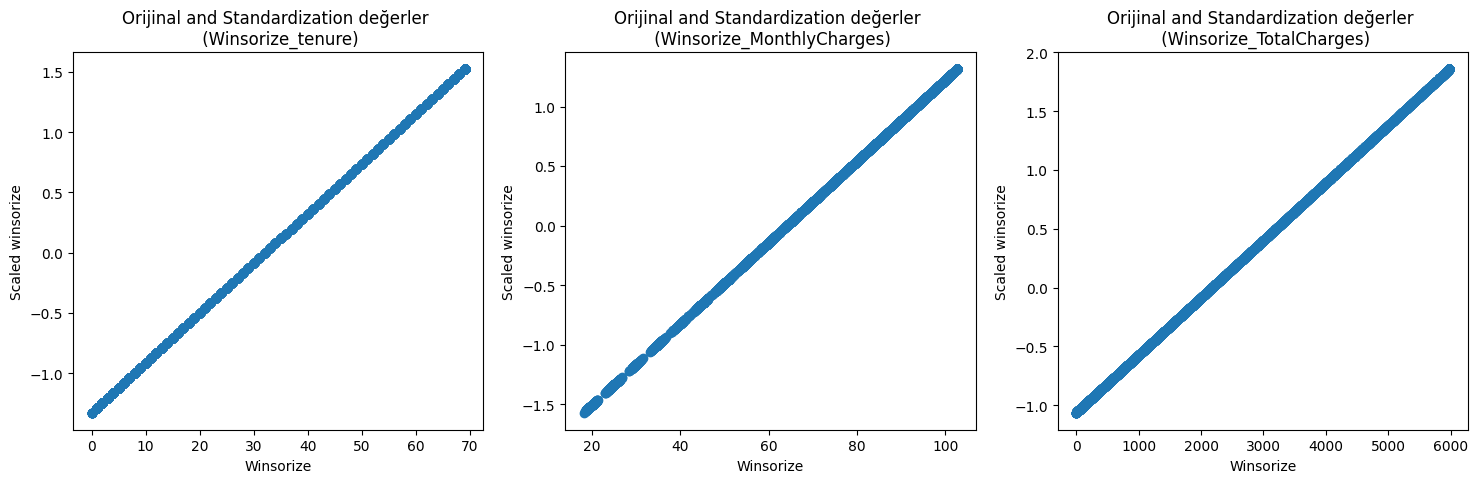

In [36]:
plt.figure(figsize=(18,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(telco[scale_features[2*i]], telco[scale_features[2*i+1]])
    plt.title("Orijinal and Standardization değerler \n ({})".format(scale_features[2*i]))
    plt.xlabel("Winsorize")
    plt.ylabel("Scaled winsorize")

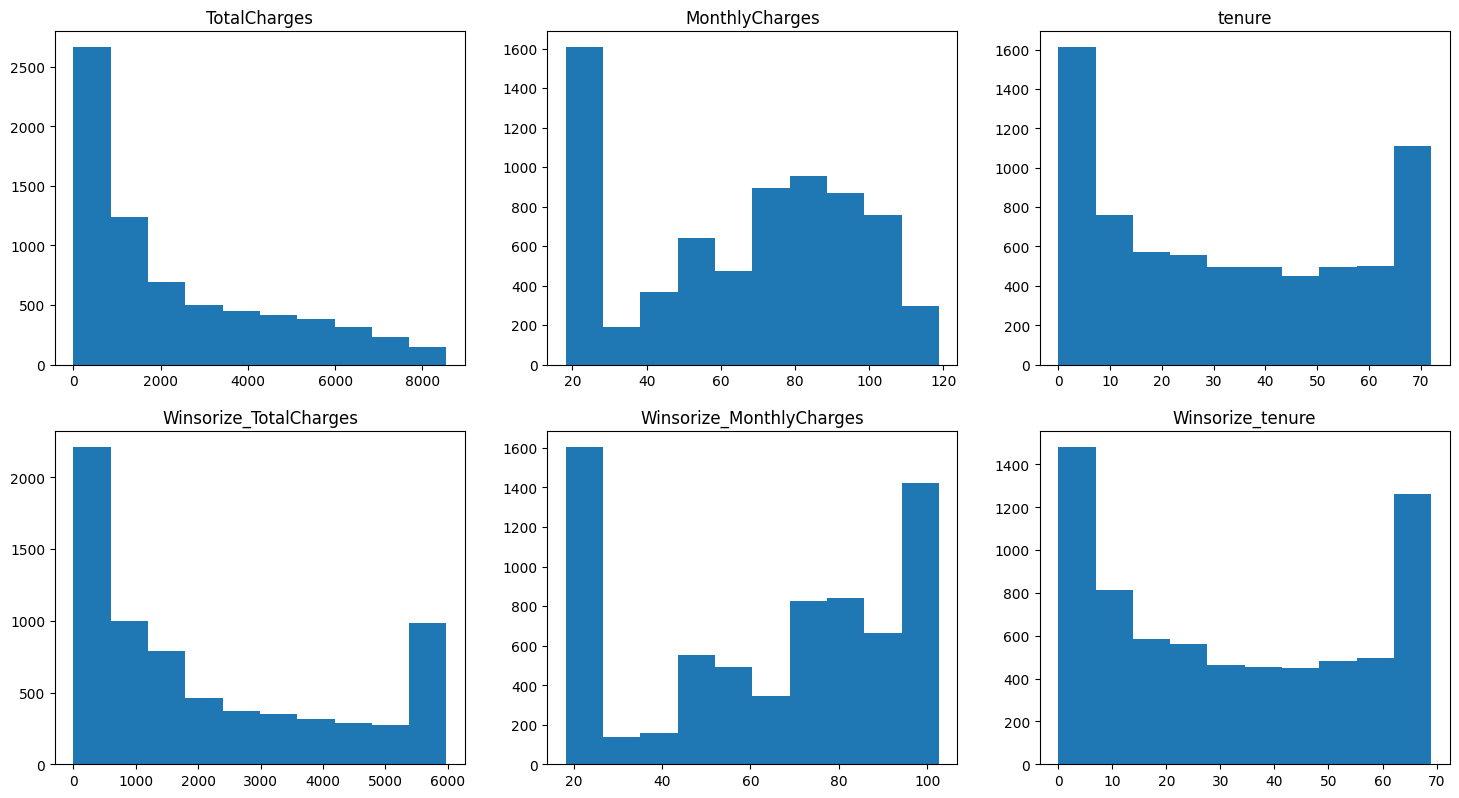

In [37]:
degiskenler = ["TotalCharges","MonthlyCharges","tenure"]
winsorize_degiskenler = ['Winsorize_TotalCharges', 'Winsorize_MonthlyCharges', 'Winsorize_tenure']
plt.figure(figsize=(18,15))
for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.hist(telco[degiskenler[i]])
    plt.title(degiskenler[i])
    
for i in range(3):
    plt.subplot(3, 3, i+4)
    plt.hist(telco[winsorize_degiskenler[i]])
    plt.title(winsorize_degiskenler[i])

In [38]:
telco

,SeniorCitizen,Partner,Dependents,tenure,Contract,PaymentMethod,MonthlyCharges,Churn,TotalCharges,Phone_Reliance,...,Online_Services,Winsorize_TotalCharges,Winsorize_MonthlyCharges,Winsorize_tenure,Norm_winsorize_tenure,Norm_winsorize_MonthlyCharges,Norm_winsorize_TotalCharges,scaled_winsorize_tenure,scaled_winsorize_MonthlyCharges,scaled_winsorize_TotalCharges
0,0,1,0,1,1,0,29.85000,0,29.85000,0.00000,...,1.00000,29.85000,29.85000,1,0.00030,0.00504,0.00012,-1.28644,-1.17301,-1.04762
1,0,0,0,34,2,1,56.95000,0,1936.30000,1.00000,...,1.00000,1936.30000,56.95000,34,0.01007,0.00962,0.00772,0.07632,-0.24745,-0.11716
2,0,0,0,2,1,1,53.85000,1,107.70000,1.00000,...,1.00000,107.70000,53.85000,2,0.00059,0.00909,0.00043,-1.24515,-0.35332,-1.00962
3,0,0,0,45,2,2,42.30000,0,1903.50000,0.00000,...,1.00000,1903.50000,42.30000,45,0.01332,0.00714,0.00759,0.53058,-0.74780,-0.13316
4,0,0,0,2,1,0,70.70000,1,141.40000,1.00000,...,1.33333,141.40000,70.70000,2,0.00059,0.01194,0.00056,-1.24515,0.22217,-0.99318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,2,1,84.80000,0,2035.20000,1.50000,...,1.66667,2035.20000,84.80000,24,0.00710,0.01432,0.00811,-0.33664,0.70374,-0.06889
7039,0,1,1,72,2,3,103.20000,0,7430.40000,1.50000,...,2.00000,5979.00000,102.60000,69,0.02043,0.01733,0.02383,1.52168,1.31168,1.85593
7040,0,1,1,11,1,0,29.60000,0,325.60000,0.00000,...,1.00000,325.60000,29.60000,11,0.00326,0.00500,0.00130,-0.87348,-1.18155,-0.90327
7041,1,1,0,4,1,1,74.40000,1,297.60000,1.50000,...,1.33333,297.60000,74.40000,4,0.00118,0.01256,0.00119,-1.16255,0.34854,-0.91694


In [39]:
telco.corr()

,SeniorCitizen,Partner,Dependents,tenure,Contract,PaymentMethod,MonthlyCharges,Churn,TotalCharges,Phone_Reliance,...,Online_Services,Winsorize_TotalCharges,Winsorize_MonthlyCharges,Winsorize_tenure,Norm_winsorize_tenure,Norm_winsorize_MonthlyCharges,Norm_winsorize_TotalCharges,scaled_winsorize_tenure,scaled_winsorize_MonthlyCharges,scaled_winsorize_TotalCharges
SeniorCitizen,1.00000,0.01648,-0.21119,0.01657,-0.14255,-0.09370,0.22017,0.15089,0.10326,0.08696,...,0.22066,0.10590,0.22269,0.01686,0.01686,0.22269,0.10590,0.01686,0.22269,0.10590
Partner,0.01648,1.00000,0.45268,0.37970,0.29481,0.13311,0.09685,-0.15045,0.31746,0.09266,...,0.05595,0.32113,0.09232,0.37844,0.37844,0.09232,0.32113,0.37844,0.09232,0.32113
Dependents,-0.21119,0.45268,1.00000,0.15971,0.24319,0.12384,-0.11389,-0.16422,0.06229,-0.01512,...,-0.13482,0.06299,-0.11693,0.15941,0.15941,-0.11693,0.06299,0.15941,-0.11693,0.06299
tenure,0.01657,0.37970,0.15971,1.00000,0.67161,0.34030,0.24790,-0.35223,0.82657,0.19414,...,0.15918,0.83758,0.23309,0.99965,0.99965,0.23309,0.83758,0.99965,0.23309,0.83758
Contract,-0.14255,0.29481,0.24319,0.67161,1.00000,0.35891,-0.07419,-0.39671,0.44696,0.06232,...,-0.15403,0.43764,-0.09126,0.66809,0.66809,-0.09126,0.43764,0.66809,-0.09126,0.43764
PaymentMethod,-0.09370,0.13311,0.12384,0.34030,0.35891,1.00000,-0.07435,-0.26282,0.22274,0.01758,...,-0.11648,0.22281,-0.08152,0.33914,0.33914,-0.08152,0.22281,0.33914,-0.08152,0.22281
MonthlyCharges,0.22017,0.09685,-0.11389,0.24790,-0.07419,-0.07435,1.00000,0.19336,0.65157,0.44652,...,0.92880,0.64794,0.99783,0.24717,0.24717,0.99783,0.64794,0.24717,0.99783,0.64794
Churn,0.15089,-0.15045,-0.16422,-0.35223,-0.39671,-0.26282,0.19336,1.00000,-0.19851,0.03088,...,0.23631,-0.20127,0.20226,-0.35231,-0.35231,0.20226,-0.20127,-0.35231,0.20226,-0.20127
TotalCharges,0.10326,0.31746,0.06229,0.82657,0.44696,0.22274,0.65157,-0.19851,1.00000,0.34309,...,0.54784,0.98938,0.63204,0.82478,0.82478,0.63204,0.98938,0.82478,0.63204,0.98938
Phone_Reliance,0.08696,0.09266,-0.01512,0.19414,0.06232,0.01758,0.44652,0.03088,0.34309,1.00000,...,0.15661,0.33943,0.44331,0.19332,0.19332,0.44331,0.33943,0.19332,0.44331,0.33943


In [40]:
a=telco.columns[12:] 
telco.drop(a, axis = 1, inplace=True)

In [41]:
telco

,SeniorCitizen,Partner,Dependents,tenure,Contract,PaymentMethod,MonthlyCharges,Churn,TotalCharges,Phone_Reliance,Support,Online_Services
0,0,1,0,1,1,0,29.85000,0,29.85000,0.00000,1.25000,1.00000
1,0,0,0,34,2,1,56.95000,0,1936.30000,1.00000,1.50000,1.00000
2,0,0,0,2,1,1,53.85000,1,107.70000,1.00000,1.50000,1.00000
3,0,0,0,45,2,2,42.30000,0,1903.50000,0.00000,1.75000,1.00000
4,0,0,0,2,1,0,70.70000,1,141.40000,1.00000,1.00000,1.33333
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,2,1,84.80000,0,2035.20000,1.50000,1.75000,1.66667
7039,0,1,1,72,2,3,103.20000,0,7430.40000,1.50000,1.50000,2.00000
7040,0,1,1,11,1,0,29.60000,0,325.60000,0.00000,1.25000,1.00000
7041,1,1,0,4,1,1,74.40000,1,297.60000,1.50000,1.00000,1.33333


In [42]:
telco.corr()

,SeniorCitizen,Partner,Dependents,tenure,Contract,PaymentMethod,MonthlyCharges,Churn,TotalCharges,Phone_Reliance,Support,Online_Services
SeniorCitizen,1.00000,0.01648,-0.21119,0.01657,-0.14255,-0.09370,0.22017,0.15089,0.10326,0.08696,0.12334,0.22066
Partner,0.01648,1.00000,0.45268,0.37970,0.29481,0.13311,0.09685,-0.15045,0.31746,0.09266,0.10088,0.05595
Dependents,-0.21119,0.45268,1.00000,0.15971,0.24319,0.12384,-0.11389,-0.16422,0.06229,-0.01512,-0.05744,-0.13482
tenure,0.01657,0.37970,0.15971,1.00000,0.67161,0.34030,0.24790,-0.35223,0.82657,0.19414,0.27399,0.15918
Contract,-0.14255,0.29481,0.24319,0.67161,1.00000,0.35891,-0.07419,-0.39671,0.44696,0.06232,0.00889,-0.15403
PaymentMethod,-0.09370,0.13311,0.12384,0.34030,0.35891,1.00000,-0.07435,-0.26282,0.22274,0.01758,0.02176,-0.11648
MonthlyCharges,0.22017,0.09685,-0.11389,0.24790,-0.07419,-0.07435,1.00000,0.19336,0.65157,0.44652,0.77478,0.92880
Churn,0.15089,-0.15045,-0.16422,-0.35223,-0.39671,-0.26282,0.19336,1.00000,-0.19851,0.03088,0.05965,0.23631
TotalCharges,0.10326,0.31746,0.06229,0.82657,0.44696,0.22274,0.65157,-0.19851,1.00000,0.34309,0.58207,0.54784
Phone_Reliance,0.08696,0.09266,-0.01512,0.19414,0.06232,0.01758,0.44652,0.03088,0.34309,1.00000,0.02566,0.15661


In [43]:
len(telco.columns)

12

In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X=StandardScaler().fit_transform(telco)
pca=PCA(n_components=12)
principalComponents=pca.fit_transform(X)
exp_var=pca.explained_variance_ratio_*100
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
print(exp_var)
print("--"*31)
print(cumsum_var)

[30.74030588 23.01128029  9.75646811  8.82356549  7.64028909  6.23327782
  5.33001276  3.94131098  2.56238518  1.23970068  0.55531644  0.16608729]
--------------------------------------------------------------
[ 30.74  53.75  63.51  72.33  79.97  86.2   91.53  95.47  98.03  99.27
  99.83 100.  ]


In [45]:
a=pd.DataFrame(principalComponents)
a

,0,1,2,3,4,5,6,7,8,9,10,11
0,-2.06643,-0.44673,0.98149,1.99152,1.23256,-1.12947,-0.30220,-1.49409,0.20558,0.10199,-0.33598,-0.12813
1,-0.24512,-0.00251,-0.98140,0.81635,-0.40740,-0.68741,-0.03286,0.19603,0.27243,0.55493,0.06431,0.04517
2,-1.46080,-1.91122,0.03346,0.52977,-0.53288,0.67776,0.77267,0.01269,0.21883,0.84916,-0.13848,-0.01201
3,-0.52555,0.54424,-1.10287,2.83645,0.79042,-0.15649,0.36553,0.09958,-0.20914,0.43820,0.12666,0.19993
4,-1.41548,-2.33675,0.28962,0.16096,-0.64467,-0.06248,0.92807,0.06516,0.18447,-0.09943,-0.00768,0.12329
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.24472,0.34223,1.73013,-0.11634,-0.64487,-0.18710,-0.94211,0.28988,0.89042,0.32183,0.16840,-0.12413
7039,3.55078,1.58639,0.70167,-0.08433,-0.62659,0.83316,-0.49526,0.24959,-0.91796,-0.50003,-0.24128,-0.14713
7040,-1.79464,0.35603,2.36861,1.94609,1.18753,-0.95781,-0.51948,-0.10771,-0.32099,0.10552,-0.17509,-0.11518
7041,-0.34921,-2.12002,0.56334,-1.98371,1.58565,0.98765,0.07563,-0.57557,0.71970,0.19375,0.03140,-0.03062


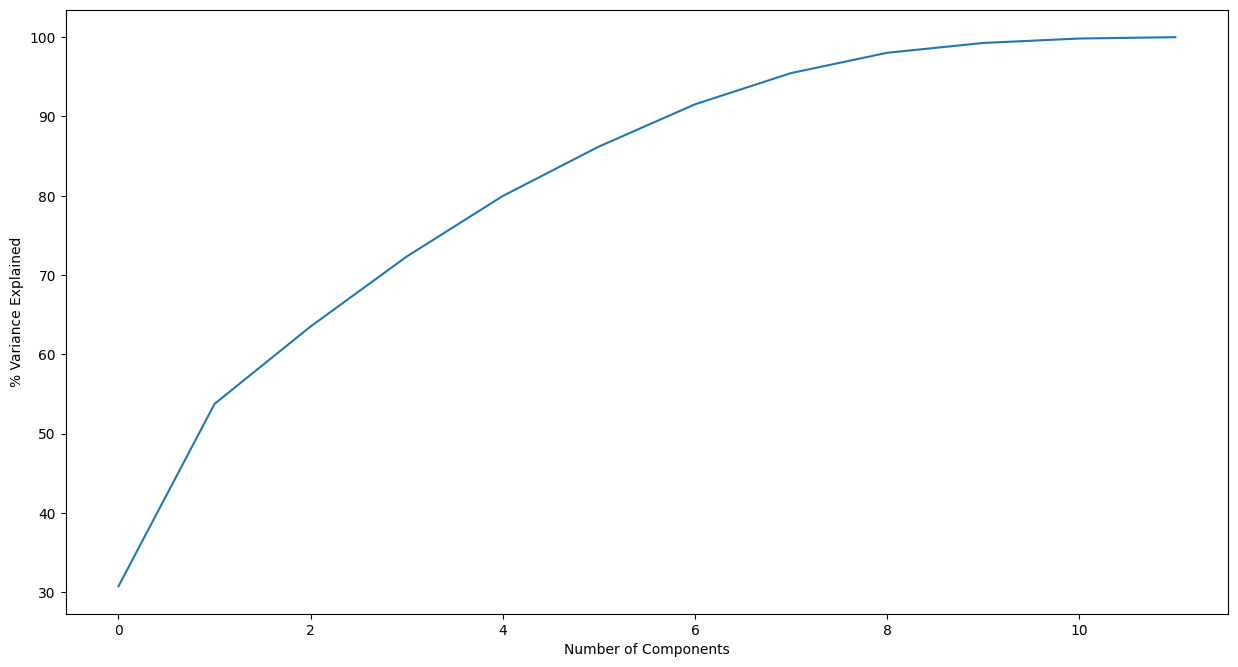

In [46]:
plt.figure(figsize=(15,8))
plt.plot(cumsum_var)
plt.xlabel("Number of Components")
plt.ylabel("% Variance Explained")
plt.show()

In [47]:
pca=PCA(n_components=9)
principalComponents=pca.fit_transform(X)
exp_var=pca.explained_variance_ratio_*100
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
print(exp_var)
print("--"*31)
print(cumsum_var)

[30.74030588 23.01128029  9.75646811  8.82356549  7.64028909  6.23327782
  5.33001276  3.94131098  2.56238518]
--------------------------------------------------------------
[30.74 53.75 63.51 72.33 79.97 86.2  91.53 95.47 98.03]


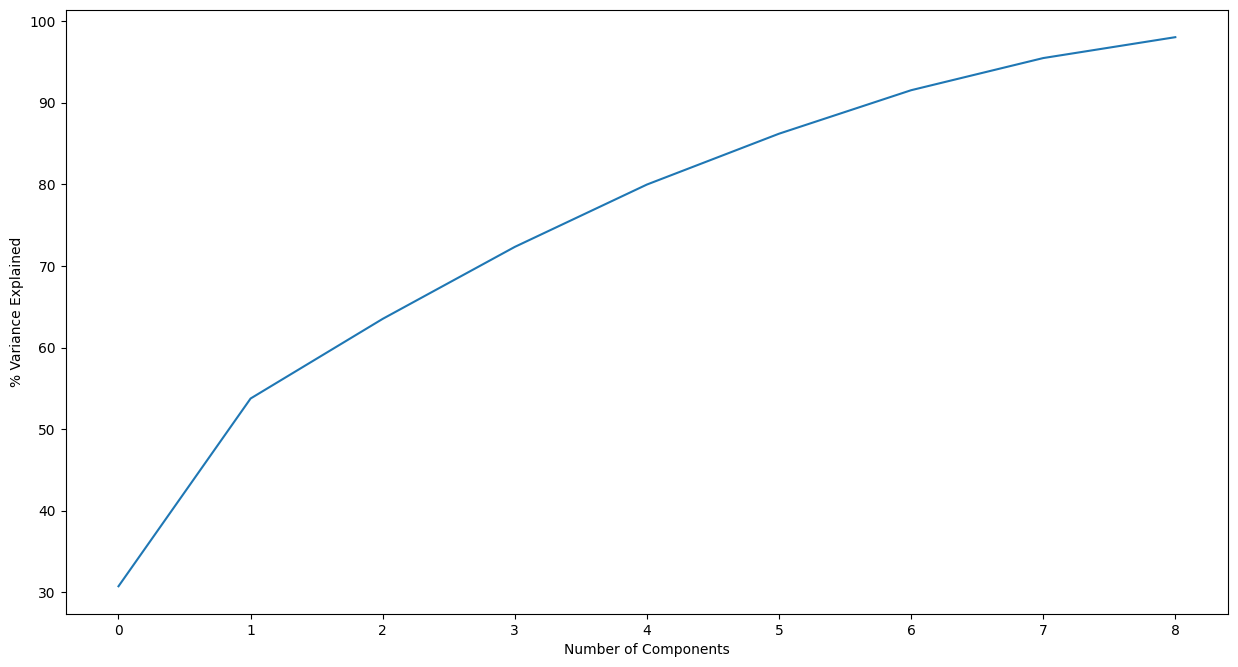

In [48]:
plt.figure(figsize=(15,8))
plt.plot(cumsum_var)
plt.xlabel("Number of Components")
plt.ylabel("% Variance Explained")
plt.show()

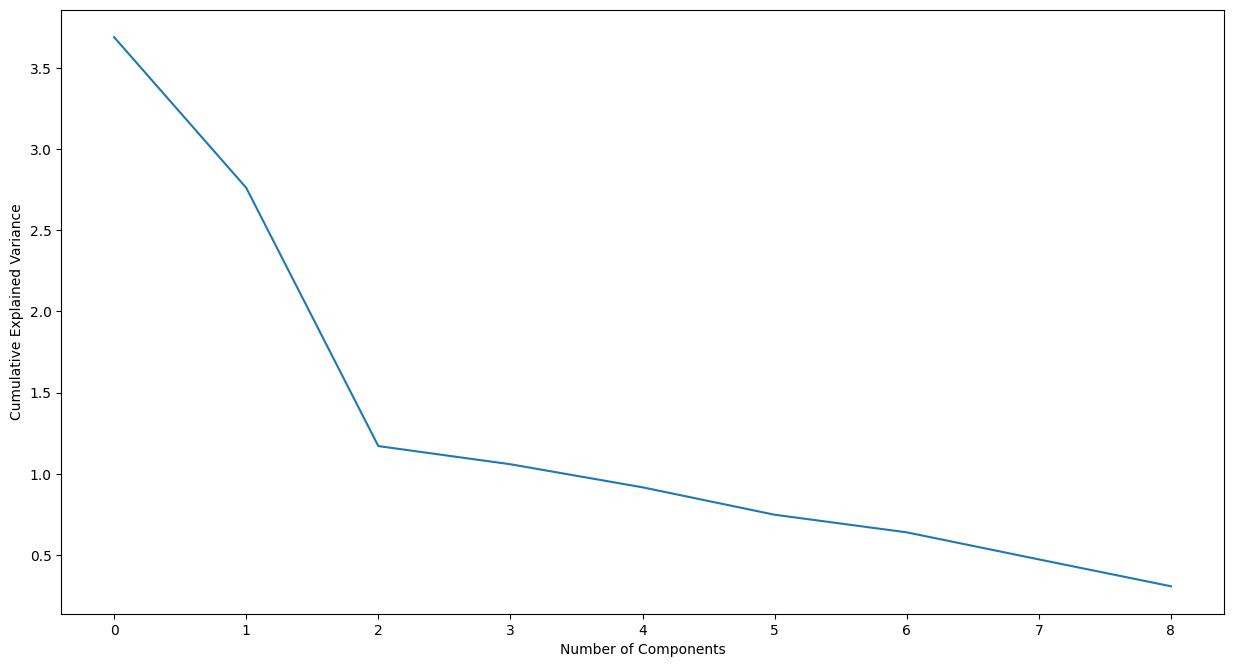

In [49]:
plt.figure(figsize=(15,8))
plt.plot(pca.explained_variance_)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [50]:
print(f"Variance ratio of PCA-1: %{pca.explained_variance_ratio_[0]*100}")
print(f"Variance ratio of PCA-2: %{pca.explained_variance_ratio_[1]*100}")
#print(f"Variance ratio of PCA-3: %{sklearn_pca.explained_variance_ratio_[2]*100}")
print("Variance of PCA-1:", pca.explained_variance_[0])
print("Variance of PCA-2:", pca.explained_variance_[1])
#print("Variance of PCA-3:", sklearn_pca.explained_variance_[2])

Variance ratio of PCA-1: %30.7403058813954
Variance ratio of PCA-2: %23.011280291741212
Variance of PCA-1: 3.689360539437679
Variance of PCA-2: 2.7617457613416647


In [51]:
pd.options.display.float_format = "{:.3f}".format

Corr = pd.DataFrame()
Corr["Churn"] = telco.Churn
Corr["PCA1"]=pd.DataFrame(principalComponents[:,0])
Corr["PCA2"]=pd.DataFrame(principalComponents[:,1])
Corr["PCA3"]=pd.DataFrame(principalComponents[:,2])
Corr["PCA4"]=pd.DataFrame(principalComponents[:,3])
Corr["PCA5"]=pd.DataFrame(principalComponents[:,4])
Corr["PCA6"]=pd.DataFrame(principalComponents[:,5])
Corr["PCA7"]=pd.DataFrame(principalComponents[:,6])
Corr["PCA8"]=pd.DataFrame(principalComponents[:,7])
Corr["PCA9"]=pd.DataFrame(principalComponents[:,8])
Corr.corr()

,Churn,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
Churn,1.000,-0.089,-0.630,0.240,-0.160,-0.002,0.360,0.615,0.035,-0.033
PCA1,-0.089,1.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000
PCA2,-0.630,-0.000,1.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000
PCA3,0.240,0.000,0.000,1.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000
PCA4,-0.160,0.000,0.000,0.000,1.000,-0.000,0.000,-0.000,0.000,0.000
PCA5,-0.002,-0.000,-0.000,-0.000,-0.000,1.000,-0.000,-0.000,0.000,0.000
PCA6,0.360,-0.000,-0.000,-0.000,0.000,-0.000,1.000,0.000,0.000,0.000
PCA7,0.615,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,1.000,0.000,0.000
PCA8,0.035,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,1.000,0.000
PCA9,-0.033,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,1.000
